<a href="https://colab.research.google.com/github/danielkorat/dynamic_ds/blob/main/Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from tqdm import tqdm
from collections import defaultdict
from numpy import log


Reusing dataset conll2003 (/home/iddo/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/40e7cb6bcc374f7c349c83acd1e9352a4f09474eb691f64f364ee62eb65d0ca6)
100%|██████████| 3250/3250 [00:00<00:00, 15839.92it/s]
/home/iddo/PycharmProjects/learning-ds/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


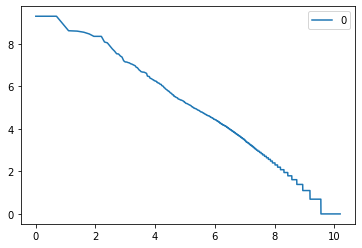

In [14]:
DS_NAME = "conll2003"

counts = defaultdict(int)
ds = load_dataset(DS_NAME)
for split in 'train', 'test', 'validation':
    for example in tqdm(ds[split]):
        for token in example['tokens']:
            counts[token.lower()] += 1

log_counts = defaultdict(int)
for w, count in counts.items():
    log_counts[w] = log(count)
sorted_counts = sorted(log_counts.values(), reverse=True)
df = pd.DataFrame(data=sorted_counts)
df.index = log(df.index)

df.plot()
plt.xlabel("sorted items in log scale")
plt.ylabel("frequency in log scale")
plt.legend([DS_NAME])
plt.show()